In [2]:
from app import app
import pandas as pd
import datetime as dt 
import numpy as np
import json

from sqlalchemy import create_engine

from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.models import Sequential 
from keras.layers import Dense, LSTM, Dropout

from flask import Flask, jsonify, request, make_response
from flask import flash, request

from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set_theme(style="darkgrid")

In [3]:
raw_data_set=pd.DataFrame()
data_set =pd.DataFrame()
index_data_set =pd.DataFrame()
tranning_set=pd.DataFrame()
result=pd.DataFrame()


In [4]:
def read_data_set():
  # Declare global variable 
  global data_set
  global raw_data_set
  global index_data_set

  # Define database connection 
  db_connection_str = 'mysql+pymysql://root:@localhost/csct'
  db_connection = create_engine(db_connection_str)

  # Read data in to Data Frame 
  raw_data_set = pd.read_sql('SELECT * FROM aw_product_demand', con=db_connection)


  # Validate Date
  raw_data_set['Date']= pd.to_datetime(raw_data_set['Date']).dt.date
  raw_data_set['Order_Demand'] = raw_data_set['Order_Demand'].astype('int64')

  #combine to single date
  data_set = raw_data_set.groupby('Date')['Order_Demand'].sum().reset_index()
  
  data_set.sort_values('Date', inplace=True)
  data_set['Date']=data_set['Date'].astype(str)

  # Create index data frame 
  index_data_set=data_set

  index_data_set=index_data_set.set_index(index_data_set['Date'])

  return data_set

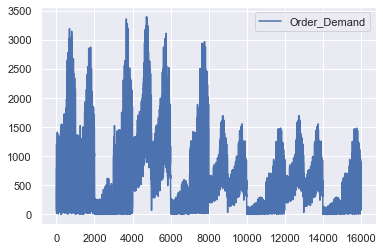

<Figure size 1440x504 with 0 Axes>

In [12]:
read_data_set()

raw_data_set.plot()
plt.figure(figsize=(20, 7))
plt.show()

In [6]:

result=pd.DataFrame()
product_array=raw_data_set['Product_code'].unique()

warehouse_array=raw_data_set['Warehouse'].unique()

print(warehouse_array.tolist())

 


['aw-hungary', 'aw-romania', 'aw-slovakia', 'aw-portugal']


In [7]:




from datetime import timedelta, datetime

# given datetime
str_d1 = '2023-1-4'
str_d2=str(data_set.tail(1)["Date"].values[0])

df_old = data_set.tail(10)
print(df_old)

# convert string to date object
d1 = datetime.strptime(str_d1, "%Y-%m-%d")
d2 = datetime.strptime(str_d2, "%Y-%m-%d")
d2+= timedelta(days=1)
start_day=datetime.strftime(d2,"%Y-%m-%d")

days_difference=(d1-d2).days
print(days_difference)

csiti = 23454
units = [11,22,33,44,55,66,77]
begin_date = '2019-10-16'

df = pd.DataFrame({ 
                   
                   'Date':pd.date_range(start_day, periods=days_difference),'Forecast':0})
print (df)






           Date  Order_Demand
990  2022-12-06          9699
991  2022-12-07          9495
992  2022-12-08          9371
993  2022-12-09          9284
994  2022-12-12          9331
995  2022-12-13          9563
996  2022-12-14          9507
997  2022-12-15          9087
998  2022-12-16          9027
999  2022-12-19          8845
15
         Date  Forecast
0  2022-12-20         0
1  2022-12-21         0
2  2022-12-22         0
3  2022-12-23         0
4  2022-12-24         0
5  2022-12-25         0
6  2022-12-26         0
7  2022-12-27         0
8  2022-12-28         0
9  2022-12-29         0
10 2022-12-30         0
11 2022-12-31         0
12 2023-01-01         0
13 2023-01-02         0
14 2023-01-03         0


In [8]:
import math

def FindLayerNodes(n_layers, first_layer_nodes, last_layer_nodes):
    layers = []
    
    nodes_increment = (last_layer_nodes - first_layer_nodes)/ (n_layers-1)
    nodes = first_layer_nodes
    for i in range(1, n_layers+1):
        layers.append(math.ceil(nodes))
        nodes = nodes + nodes_increment
    
    return layers

FindLayerNodes(4, 100, 1)

[100, 67, 34, 1]

In [9]:
def createmodel(n_layers, first_layer_nodes, last_layer_nodes, activation_func, loss_func):
    model = Sequential()
    n_nodes = FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes)
    for i in range(1, n_layers):
        if i==1:
            model.add(Dense(first_layer_nodes, input_dim=X_train.shape[1], activation=activation_func))
        else:
            model.add(Dense(n_nodes[i-1], activation=activation_func))
            
    #Finally, the output layer should have a single node in binary classification
    model.add(Dense(1, activation=activation_func))
    model.compile(optimizer='adam', loss=loss_func, metrics = ["accuracy"]) #note: metrics could also be 'mse'
    
    return model

In [10]:
import math  
import sklearn.metrics  
actual = [0, 1, 2, 0, 3]  
predicted = [0.2, 2.3, 4.5, 0.5, 1.1]  
mse = sklearn.metrics.mean_squared_error(actual, predicted)  
  
rmse = math.sqrt(mse)  
  
print("The difference between actual and predicted values", rmse)  

The difference between actual and predicted values 1.5388307249337076
